In [67]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
from pathlib import Path
csvpath = Path('berkshire_data_df.csv')
df = pd.read_csv(csvpath,  parse_dates=True, infer_datetime_format=True)
df.head()

,Unnamed: 0,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,Daily Portfolio Return,cumulative portfolio return
0,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
1,2019-01-02,0.000029,0.000697,0.000181,0.005111,0.000426,0.001189,-0.000291,-0.000060,-3.303973e-06,-0.000128,0.000297,0.007447,1.007447
2,2019-01-03,-0.000078,-0.000569,-0.000062,-0.008362,-0.001340,-0.010178,-0.000814,0.000017,8.305420e-07,-0.000271,-0.000477,-0.022134,0.985148
3,2019-01-04,0.000118,0.001643,0.000252,0.014264,0.001830,0.009026,0.003432,0.000028,2.494949e-06,0.000405,0.000795,0.031796,1.016472
4,2019-01-07,0.000011,0.000480,0.000109,0.001132,0.000393,0.002163,-0.000018,0.000024,-1.249300e-06,0.000069,0.000595,0.004957,1.021510


In [106]:
df = df.rename(columns={'Unnamed: 0':'date'})
df.head()

,date,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,Daily Portfolio Return,cumulative portfolio return
0,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
1,2019-01-02,0.000029,0.000697,0.000181,0.005111,0.000426,0.001189,-0.000291,-0.000060,-3.303973e-06,-0.000128,0.000297,0.007447,1.007447
2,2019-01-03,-0.000078,-0.000569,-0.000062,-0.008362,-0.001340,-0.010178,-0.000814,0.000017,8.305420e-07,-0.000271,-0.000477,-0.022134,0.985148
3,2019-01-04,0.000118,0.001643,0.000252,0.014264,0.001830,0.009026,0.003432,0.000028,2.494949e-06,0.000405,0.000795,0.031796,1.016472
4,2019-01-07,0.000011,0.000480,0.000109,0.001132,0.000393,0.002163,-0.000018,0.000024,-1.249300e-06,0.000069,0.000595,0.004957,1.021510


In [107]:
df.set_index('date', inplace=True, drop=True)

In [108]:
df.head()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,Daily Portfolio Return,cumulative portfolio return
date,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
2019-01-02,0.000029,0.000697,0.000181,0.005111,0.000426,0.001189,-0.000291,-0.000060,-3.303973e-06,-0.000128,0.000297,0.007447,1.007447
2019-01-03,-0.000078,-0.000569,-0.000062,-0.008362,-0.001340,-0.010178,-0.000814,0.000017,8.305420e-07,-0.000271,-0.000477,-0.022134,0.985148
2019-01-04,0.000118,0.001643,0.000252,0.014264,0.001830,0.009026,0.003432,0.000028,2.494949e-06,0.000405,0.000795,0.031796,1.016472
2019-01-07,0.000011,0.000480,0.000109,0.001132,0.000393,0.002163,-0.000018,0.000024,-1.249300e-06,0.000069,0.000595,0.004957,1.021510


In [109]:
df = df.iloc[1:]
df.head()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,Daily Portfolio Return,cumulative portfolio return
date,,,,,,,,,,,,,
2019-01-02,0.000029,0.000697,0.000181,0.005111,0.000426,0.001189,-0.000291,-0.000060,-3.303973e-06,-0.000128,0.000297,0.007447,1.007447
2019-01-03,-0.000078,-0.000569,-0.000062,-0.008362,-0.001340,-0.010178,-0.000814,0.000017,8.305420e-07,-0.000271,-0.000477,-0.022134,0.985148
2019-01-04,0.000118,0.001643,0.000252,0.014264,0.001830,0.009026,0.003432,0.000028,2.494949e-06,0.000405,0.000795,0.031796,1.016472
2019-01-07,0.000011,0.000480,0.000109,0.001132,0.000393,0.002163,-0.000018,0.000024,-1.249300e-06,0.000069,0.000595,0.004957,1.021510
2019-01-08,0.000029,0.000660,0.000060,-0.000281,0.000687,0.001694,0.001765,0.000050,2.653177e-06,0.000115,0.000249,0.005032,1.026650


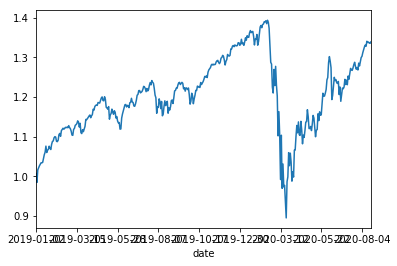

In [110]:
df["cumulative portfolio return"].plot()

## Linear Regression Model with a single-training-window 

In [114]:
df["Lagged_Return"] = df["cumulative portfolio return"].shift()
df = df.dropna()
df.head()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,Daily Portfolio Return,cumulative portfolio return,Lagged_Return
date,,,,,,,,,,,,,,
2019-01-03,-7.793627e-05,-0.000569,-0.000062,-0.008362,-0.001340,-0.010178,-0.000814,0.000017,8.305420e-07,-0.000271,-0.000477,-0.022134,0.985148,1.007447
2019-01-04,1.176327e-04,0.001643,0.000252,0.014264,0.001830,0.009026,0.003432,0.000028,2.494949e-06,0.000405,0.000795,0.031796,1.016472,0.985148
2019-01-07,1.061401e-05,0.000480,0.000109,0.001132,0.000393,0.002163,-0.000018,0.000024,-1.249300e-06,0.000069,0.000595,0.004957,1.021510,1.016472
2019-01-08,2.884872e-05,0.000660,0.000060,-0.000281,0.000687,0.001694,0.001765,0.000050,2.653177e-06,0.000115,0.000249,0.005032,1.026650,1.021510
2019-01-09,8.998507e-07,0.000023,0.000110,0.001968,0.000314,0.002727,-0.001796,-0.000012,-1.609595e-06,0.000041,0.000119,0.003492,1.030236,1.026650


In [115]:
training_window = 30
timeframe = len(df.index) - training_window - 1
print(timeframe)

377


In [116]:
# Construct empty placeholder dataframes.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

In [118]:
# During rolling iteration, split into train and test sets.
# Use linear regression to predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = df.index[i]
    
    # End of training window
    end_of_training_period = df.index[training_window+i]

    # Window of test-window data
    test_day = df.index[training_window + i + 1]
    
    # String of testing window
    start_of_test_day  = test_day
    end_of_test_day = test_day
    
    train = df.loc[start_of_training_period:end_of_training_period]
    test = df.loc[start_of_test_day:end_of_test_day]
    
    
    
    # Create new dataframes:
    X_train = train["Lagged_Return"].to_frame()
    y_train = train["cumulative portfolio return"]
    X_test = test["Lagged_Return"].to_frame()
    y_test = test["cumulative portfolio return"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)   

In [126]:
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.tail()

,Actual Returns,Predictions
2020-08-13,1.337672,1.342334
2020-08-14,1.338782,1.339569
2020-08-17,1.336031,1.340085
2020-08-18,1.335635,1.336861
2020-08-19,1.339364,1.337089


In [124]:
# X_test Data
split = int(0.25*timeframe)
results_test = Results.iloc[-split:]
results_test

,Actual Returns,Predictions
2020-04-07,1.066712,1.063525
2020-04-08,1.100994,1.063706
2020-04-09,1.128603,1.092797
2020-04-13,1.109935,1.114398
2020-04-14,1.137551,1.100008
2020-04-15,1.105499,1.122594
2020-04-16,1.103412,1.091964
2020-04-17,1.138991,1.090006
2020-04-20,1.117718,1.110415
2020-04-21,1.082341,1.093687


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6B33D5DC8>,
      dtype=object)

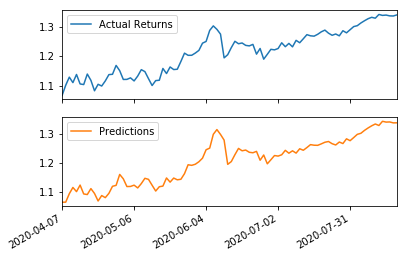

In [125]:
# Plot the results
results_test.plot(subplots=True)